In [2]:
%%bash
yes|pip2 uninstall captcha
yes|pip2 uninstall Pillow
pip2 install -U Pillow
pip2 install captcha

Uninstalling captcha-0.2.1:
  /usr/local/lib/python2.7/dist-packages/captcha-0.2.1.dist-info/DESCRIPTION.rst
  /usr/local/lib/python2.7/dist-packages/captcha-0.2.1.dist-info/INSTALLER
  /usr/local/lib/python2.7/dist-packages/captcha-0.2.1.dist-info/METADATA
  /usr/local/lib/python2.7/dist-packages/captcha-0.2.1.dist-info/RECORD
  /usr/local/lib/python2.7/dist-packages/captcha-0.2.1.dist-info/WHEEL
  /usr/local/lib/python2.7/dist-packages/captcha-0.2.1.dist-info/metadata.json
  /usr/local/lib/python2.7/dist-packages/captcha-0.2.1.dist-info/top_level.txt
  /usr/local/lib/python2.7/dist-packages/captcha/__init__.py
  /usr/local/lib/python2.7/dist-packages/captcha/__init__.pyc
  /usr/local/lib/python2.7/dist-packages/captcha/audio.py
  /usr/local/lib/python2.7/dist-packages/captcha/audio.pyc
  /usr/local/lib/python2.7/dist-packages/captcha/data/0/default.wav
  /usr/local/lib/python2.7/dist-packages/captcha/data/1/default.wav
  /usr/local/lib/python2.7/dist-packages/captcha/data/2/default.w

yes: standard output: Broken pipe
yes: write error
yes: standard output: Broken pipe
yes: write error


In [15]:
from io import BytesIO
from captcha.image import ImageCaptcha,WheezyCaptcha
from IPython.display import Image

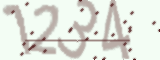

In [17]:
captcha = ImageCaptcha()
data = captcha.generate('1234')
captcha.write('1234', 'out.png')
Image("out.png")

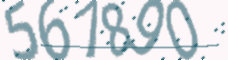

In [18]:
wheezy_captcha = WheezyCaptcha()
captcha.generate('567890')
captcha.write('567890', 'out.png')
Image("out.png")

In [19]:
%%bash
cat /etc/fonts/fonts.conf

<?xml version="1.0"?>
<!DOCTYPE fontconfig SYSTEM "fonts.dtd">
<!-- /etc/fonts/fonts.conf file to configure system font access -->
<fontconfig>

<!--
	DO NOT EDIT THIS FILE.
	IT WILL BE REPLACED WHEN FONTCONFIG IS UPDATED.
	LOCAL CHANGES BELONG IN 'local.conf'.

	The intent of this standard configuration file is to be adequate for
	most environments.  If you have a reasonably normal environment and
	have found problems with this configuration, they are probably
	things that others will also want fixed.  Please submit any
	problems to the fontconfig bugzilla system located at fontconfig.org

	Note that the normal 'make install' procedure for fontconfig is to
	replace any existing fonts.conf file with the new version.  Place
	any local customizations in local.conf which this file references.

	Keith Packard
-->

<!-- Font directory list -->

	<dir>/usr/share/fonts</dir>
	<dir>/usr/local/share/fonts</dir>
	<dir prefix="xdg">fonts</dir>
	<!-- the following element will be removed in the fu

In [26]:
%%bash
ls /usr/share/fonts/truetype/*

/usr/share/fonts/truetype/dejavu:
DejaVuSans-Bold.ttf
DejaVuSansMono-Bold.ttf
DejaVuSansMono.ttf
DejaVuSans.ttf
DejaVuSerif-Bold.ttf
DejaVuSerif.ttf

/usr/share/fonts/truetype/lyx:
cmex10.ttf
cmmi10.ttf
cmr10.ttf
cmsy10.ttf
esint10.ttf
eufm10.ttf
msam10.ttf
msbm10.ttf
rsfs10.ttf
wasy10.ttf


In [27]:
import glob

In [31]:
fonts = glob.glob('/usr/share/fonts/truetype/dejavu/*.ttf')

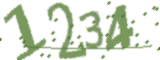

In [73]:
captcha = ImageCaptcha(fonts=fonts)
data = captcha.generate('1234')
captcha.write('1234', 'out.png')
Image("out.png")

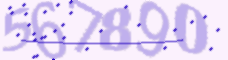

In [83]:
wheezy_captcha = WheezyCaptcha(fonts=fonts)
captcha.generate_image('567890')

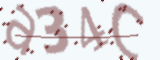

In [85]:
captcha = ImageCaptcha(fonts=fonts)
captcha.generate_image('a34c')

In [87]:
import numpy as np

In [90]:
img = captcha.generate_image('9e3o')
arr = np.asarray(img, dtype="float32")/255.0

In [95]:
data = np.empty((1, 3, 60, 160), dtype="float32")
data[0, :, :, :] = np.rollaxis(arr, 2)

In [114]:
help(img.resize)

Help on method resize in module PIL.Image:

resize(self, size, resample=0) method of PIL.Image.Image instance
    Returns a resized copy of this image.
    
    :param size: The requested size in pixels, as a 2-tuple:
       (width, height).
    :param resample: An optional resampling filter.  This can be
       one of :py:attr:`PIL.Image.NEAREST`, :py:attr:`PIL.Image.BOX`,
       :py:attr:`PIL.Image.BILINEAR`, :py:attr:`PIL.Image.HAMMING`,
       :py:attr:`PIL.Image.BICUBIC` or :py:attr:`PIL.Image.LANCZOS`.
       If omitted, or if the image has mode "1" or "P", it is
       set :py:attr:`PIL.Image.NEAREST`.
       See: :ref:`concept-filters`.
    :returns: An :py:class:`~PIL.Image.Image` object.



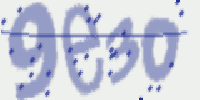

In [112]:
img.resize((200, 100))

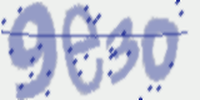

In [113]:
img.resize((200, 100), PIL.Image.LANCZOS)

The following code is adapted from https://github.com/skyduy/CNN_keras/blob/master/core/train_with_acc_2.py

In [116]:
from numpy import argmax, array
from sklearn.cross_validation import train_test_split
from keras.callbacks import Callback, ModelCheckpoint
from keras.models import Graph
from keras.utils import np_utils
from keras.layers.core import Dense, Flatten, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D

Using Theano backend.


In [132]:
import random
import IPython.display as display

'5958'

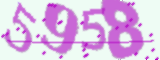

'6430'

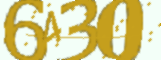

'8632'

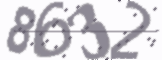

'3152'

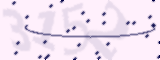

'6125'

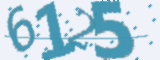

In [144]:
SAMPLE_SIZE = 5
INVALID_DIGIT = -1
labels = []
images = []
for i in range(0, SAMPLE_SIZE):
    digits = 0
    last_digit = INVALID_DIGIT
    for j in range(0, 4):
        digit = last_digit
        while digit == last_digit:
            digit = random.randint(0, 9)
        last_digit = digit
        digits = digits * 10 + digit
    digits_as_str = "%04d" % digits
    labels.append(digits_as_str)
    images.append(captcha.generate_image("%04d" % digits))

for index in range(SAMPLE_SIZE):
    display.display(labels[index])
    display.display(images[index])

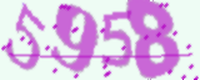

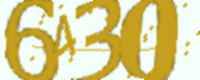

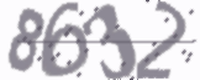

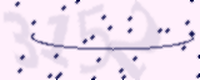

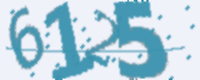

In [161]:
IMAGE_STD_WIDTH = 200
IMAGE_STD_HEIGHT = 80
data = np.empty((SAMPLE_SIZE, 3, IMAGE_STD_HEIGHT, IMAGE_STD_WIDTH), dtype="float32")
for index in range(0, SAMPLE_SIZE):
    img = images[index].resize((IMAGE_STD_WIDTH, IMAGE_STD_HEIGHT), PIL.Image.LANCZOS)
    display.display(img)
    arr = np.asarray(img, dtype="float32") / 255.0
    data[index, :, :, :] = np.rollaxis(arr, 2)

In [162]:
X, Y_all = data, labels 
X_train, X_test, y_train, y_test = train_test_split(X, Y_all, test_size=0.1, random_state=0)

In [163]:
print y_train

['5958', '6430', '3152', '6125']


In [164]:
y_train = np_utils.to_categorical(y_train, 10)
# TODO we have to figure out a way to train it without spliting the images

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices